In [1]:
import tensorflow as tf
import sys
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import os
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [3]:
from pathlib import Path

DATA_PATH  = Path('flood data/flood-train-images')
DATA_PATH1  = Path('flood data/flood-train-labels')

In [4]:
df = pd.read_csv('flood-training-metadata.csv')

In [5]:
df.head()

,image_id,chip_id,flood_id,polarization,location,scene_start
0,awc00_vh,awc00,awc,vh,Bolivia,2018-02-15
1,awc00_vv,awc00,awc,vv,Bolivia,2018-02-15
2,awc01_vh,awc01,awc,vh,Bolivia,2018-02-15
3,awc01_vv,awc01,awc,vv,Bolivia,2018-02-15
4,awc02_vh,awc02,awc,vh,Bolivia,2018-02-15


In [6]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
location_counts = (
    df.groupby("location")["chip_id"].nunique().sort_values(ascending=False)
)

Text(0.5, 1.0, 'Number of Chips by Location')

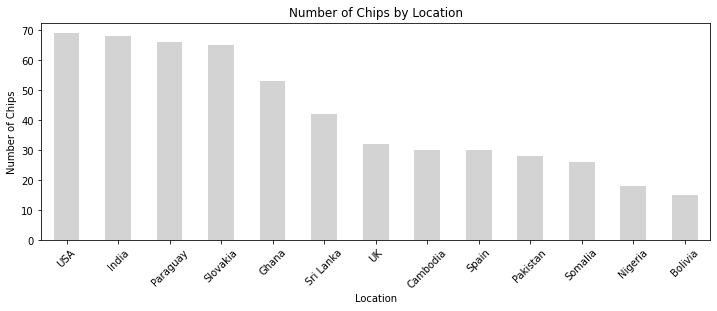

In [8]:
plt.figure(figsize=(12, 4))
location_counts.plot(kind="bar", color="lightgray")
plt.xticks(rotation=45)
plt.xlabel("Location")
plt.ylabel("Number of Chips")
plt.title("Number of Chips by Location")


In [9]:
df['scene_start'] = pd.to_datetime(df['scene_start'], errors='coerce')
year = df.scene_start.dt.year
year_counts = df.groupby(year)["flood_id"].nunique()
year_counts

scene_start
2016    1
2017    2
2018    6
2019    3
2020    1
Name: flood_id, dtype: int64

In [10]:
df.groupby("flood_id")["scene_start"].nunique()


flood_id
awc    1
ayt    1
coz    1
hbe    1
hxu    1
jja    1
kuo    1
pxs    1
qus    1
qxb    1
tht    1
tnp    1
wvy    1
Name: scene_start, dtype: int64

In [11]:
# !pip install pandas_path

In [12]:
from pandas_path import path

df["feature_path"] = (
    str(DATA_PATH)
    / df.image_id.path.with_suffix(".tif").path
)


df["label_path"] = (
    str(DATA_PATH1)
    / df.chip_id.path.with_suffix(".tif").path
)

In [13]:
df.head()

,image_id,chip_id,flood_id,polarization,location,scene_start,feature_path,label_path
0,awc00_vh,awc00,awc,vh,Bolivia,2018-02-15,flood data/flood-train-images/awc00_vh.tif,flood data/flood-train-labels/awc00.tif
1,awc00_vv,awc00,awc,vv,Bolivia,2018-02-15,flood data/flood-train-images/awc00_vv.tif,flood data/flood-train-labels/awc00.tif
2,awc01_vh,awc01,awc,vh,Bolivia,2018-02-15,flood data/flood-train-images/awc01_vh.tif,flood data/flood-train-labels/awc01.tif
3,awc01_vv,awc01,awc,vv,Bolivia,2018-02-15,flood data/flood-train-images/awc01_vv.tif,flood data/flood-train-labels/awc01.tif
4,awc02_vh,awc02,awc,vh,Bolivia,2018-02-15,flood data/flood-train-images/awc02_vh.tif,flood data/flood-train-labels/awc02.tif


In [14]:
image_path = df.feature_path[2]
image_path

'flood data/flood-train-images/awc01_vh.tif'

In [15]:
df.feature_path[0]

'flood data/flood-train-images/awc00_vh.tif'

A GIS raster dataset is different from an ordinary image; its elements (or “pixels”) are mapped to regions on the earth’s
surface. Every pixels of a dataset is contained within a spatial bounding box

In [16]:
import rasterio
from rasterio.plot import show

In [17]:
with rasterio.open('flood data/flood-train-images/awc00_vv.tif') as img:
    metadata = img.meta
    bounds = img.bounds
    data = img.read(1)  # read a single band

In [18]:
metadata

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': 0.0,
 'width': 512,
 'height': 512,
 'count': 1,
 'crs': CRS.from_epsg(32720),
 'transform': Affine(10.0, 0.0, 314030.0,
        0.0, -10.0, 8585890.0)}

In [19]:
# core project/flood data/flood-train-images/awc00_vv.tif

In [20]:
bounds

BoundingBox(left=314030.0, bottom=8580770.0, right=319150.0, top=8585890.0)

In [21]:
with rasterio.open(image_path) as img:
    gdal_mask = img.dataset_mask()

gdal_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [22]:
gdal_mask.shape

(512, 512)

In [23]:
with rasterio.open(image_path) as img:
    numpy_mask = img.read(1, masked=True)

numpy_mask


masked_array(
  data=[[-22.317798614501953, -21.71045684814453, -20.843141555786133,
         ..., -14.66640853881836, -14.756786346435547,
         -13.070296287536621],
        [-20.5567626953125, -21.69026756286621, -20.656139373779297, ...,
         -12.578502655029297, -14.174304962158203, -13.787808418273926],
        [-20.54503059387207, -20.641498565673828, -19.764970779418945,
         ..., -11.732443809509277, -12.85290813446045,
         -13.368820190429688],
        ...,
        [-15.636994361877441, -14.393763542175293, -14.081609725952148,
         ..., -10.61632251739502, -10.55478286743164,
         -11.360032081604004],
        [-14.602492332458496, -16.00651741027832, -16.01943588256836,
         ..., -10.853882789611816, -10.759099960327148,
         -11.815302848815918],
        [-13.68298625946045, -14.003754615783691, -15.292069435119629,
         ..., -10.65359878540039, -10.730338096618652,
         -12.165740966796875]],
  mask=[[False, False, False, ..., False

0.0


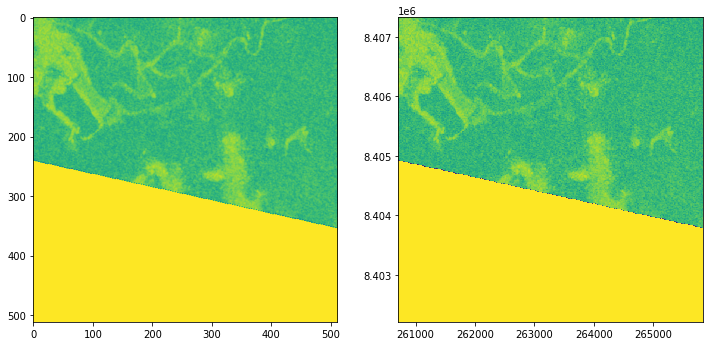

In [24]:
from matplotlib import pyplot
import shutil
tmp = shutil.copy(df.feature_path[6], df.feature_path[7])
src = rasterio.open(tmp, mode="r+")
with rasterio.open(tmp) as img2:
  hist2 = img2.read()
  print(img2.nodata)
  # show(img2.read(), transform=img2.transform)
  fig, (ax1, ax2) = pyplot.subplots(1,2, figsize=(12, 12))

  show(hist2, ax=ax1)
  show((img2, 1), interpolation='none', ax=ax2)
  pyplot.show()

In [25]:
hist2.max()

0.0

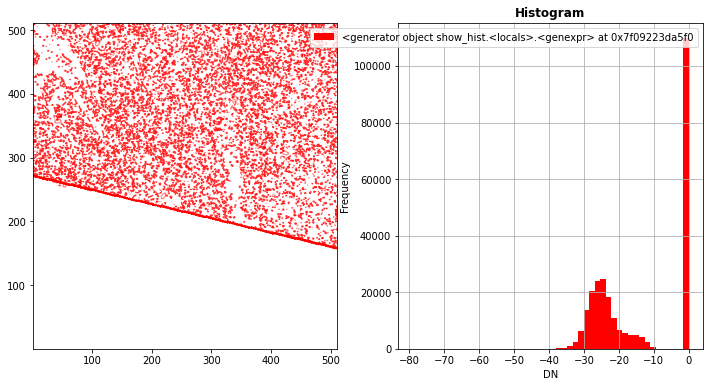

In [26]:
# plt.xlim(xmin=0, xmax = 1)
hist3 = rasterio.plot.adjust_band(hist2, kind='linear')
fig, (ax1, ax2) = pyplot.subplots(1,2, figsize=(12, 6))
rasterio.plot.show((hist2), contour=True, ax=ax1)
rasterio.plot.show_hist(hist2, bins=50, histtype='stepfilled', lw=0.0, stacked = False, ax=ax2)



In [27]:
import warnings

warnings.filterwarnings("ignore")

In [28]:
def scale_img(matrix):
    # Set min/max values
    min_values = np.array([-23, -28, 0.2])
    max_values = np.array([0, -5, 1])

    # Reshape matrix
    w, h, d = matrix.shape
    matrix = np.reshape(matrix, [w * h, d]).astype(np.float64)
    # print("matrix shape", matrix.shape)
    # Scale by min/max
    matrix = (matrix - min_values[None, :]) / (
        max_values[None, :] - min_values[None, :]
    )
    matrix = np.reshape(matrix, [w, h, d])

    # Limit values to 0/1 interval
    return matrix.clip(0, 1)


def create_false_color_composite(path_vv, path_vh):
    # Read VV/VH bands
    with rasterio.open(path_vv) as vv:
        vv_img = vv.read(1)
    with rasterio.open(path_vh) as vh:
        vh_img = vh.read(1)

    # Stack arrays along the last dimension
    s1_img = np.stack((vv_img, vh_img), axis=-1)

    # Create false color composite
    img = np.zeros((512, 512, 3), dtype=np.float32)
    img[:, :, :2] = s1_img.copy()
    img[:, :, 2] = s1_img[:, :, 0] / s1_img[:, :, 1]

    return scale_img(img)


def display_random_chip(chip_no):
    f, ax = plt.subplots(1, 2, figsize=(9, 9))

    # Select a random chip from df
    random_chip = df.chip_id[chip_no]
    chip_df = df[df.chip_id == random_chip]

    # Extract paths to image files
    vh_path = chip_df[chip_df.polarization == "vh"].feature_path.values[0]
    vv_path = chip_df[chip_df.polarization == "vv"].feature_path.values[0]
    label_path = chip_df.label_path.values[0]

    # Create false color composite
    s1_img = create_false_color_composite(vv_path, vh_path)

    # Visualize features
    ax[0].imshow(s1_img)
    ax[0].set_title("S1 Chip", fontsize=14)

    # Load water mask
    with rasterio.open(label_path) as lp:
        lp_img = lp.read(1)

    # Mask missing data and 0s for visualization
    label = np.ma.masked_where((lp_img == 0) | (lp_img == 255), lp_img)
    print(label.shape)
    # Visualize water label
    ax[1].imshow(s1_img)
    ax[1].imshow(label, cmap="cool", alpha=1)
    ax[1].set_title("S1 Chip with Water Label", fontsize=14)

    plt.tight_layout(pad=5)
    plt.show()

(512, 512)


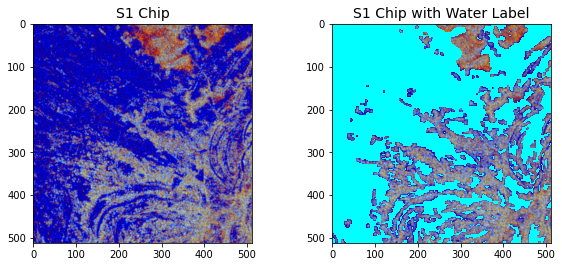

In [29]:
display_random_chip(50)

(512, 512)


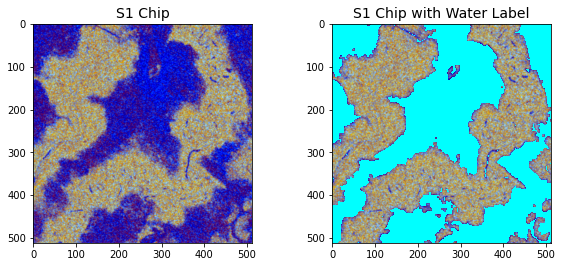

In [30]:
display_random_chip(8)

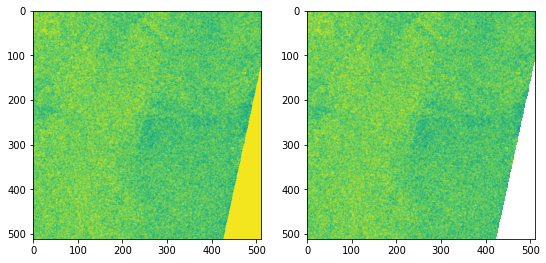

In [31]:
# load dataset
path_vv1 = df.feature_path[5]

with rasterio.open(path_vv1) as vv:
    vv_img = vv.read(1)

f, ax = plt.subplots(1, 2, figsize=(9, 9))

vv_img_mask = np.ma.masked_where((vv_img == 0) | (vv_img == 255), vv_img)
ax[0].imshow(vv_img)
ax[1].imshow(vv_img_mask)

(512, 512)


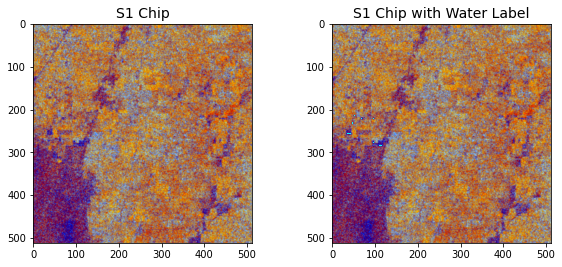

In [32]:
display_random_chip(90)

(512, 512)


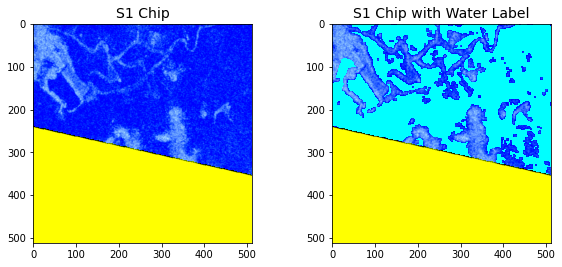

In [33]:
display_random_chip(6)

## Data Splitting 

In [34]:
from sklearn.model_selection import train_test_split
import albumentations as A


In [35]:
def process_mask(mask):
    mask_temp = mask.copy()
    mask_temp[mask == 255] = 0
    return mask_temp


In [36]:
def augment_image(image, mask):

    aug = A.Compose([
        
        A.RandomResizedCrop(512, 512, scale=(0.75, 1.0), p=0.5),
        A.VerticalFlip(p=0.5),
        A.HorizontalFlip(p=0.5),
        A.RandomRotate90(p=0.5),
        A.Blur(p=0.5),
        
    
    ])

    augmented = aug(image=image, mask=mask)

    return augmented['image'], augmented['mask']


In [37]:
class CustomDataGen(tf.keras.utils.Sequence):
    
    def __init__(self, paths,
                 augment=True,
                 batch_size=16,
                 input_shape=512,
                 shuffle=True,
                 channels=2):
        
        self.channels = channels
        self.paths = paths
        self.augment = augment
        self.batch_size = batch_size
        self.input_shape = input_shape
        self.shuffle = shuffle
        self.n = len(self.paths)
        self.on_epoch_end()
        
    
    def on_epoch_end(self):
        
        self.indexes = np.arange(len(self.paths))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    
    def __load_data(self, paths):
    
        X_batch = []
        y_batch = []
        
        for path in paths:

            with rasterio.open('../core project/flood data/flood-train-images/{}_vv.tif'.format(path)) as fvv:
                vv = fvv.read(1)
            with rasterio.open('../core project/flood data/flood-train-images/{}_vh.tif'.format(path)) as fvh:
                vh = fvh.read(1)
            
            with rasterio.open('../core project/flood data/flood-train-labels/{}.tif'.format(path)) as fmask:
                mask = process_mask(fmask.read(1))
            
            if self.channels == 2:
                X = np.zeros((512, 512, 2))
                X[:, :, 0] = (vh - (vh.min())) / (vh.max() - vh.min())
                X[:, :, 1] = (vv - (vv.min())) / (vv.max() - vv.min())
                
#                 X[:, :, 0] = vh
#                 X[:, :, 1] = vv
                
            elif self.channels == 3:
                X_ = np.stack((vv, vh), axis=-1)

                # Create false color composite
                X = np.zeros((512, 512, 3), dtype=np.float32)
                X[:, :, :2] = X_.copy()
                X[:, :, 2] = X_[:, :, 0] / X_[:, :, 1]


            # X = X/255.0
            y = mask.copy()
            
            if self.augment:
                X, y = augment_image(X, mask)
                
            X_batch.append(X)
            y_batch.append(y)
            
        return np.array(X_batch, dtype=float), np.array(y_batch, dtype=float)
    
    
    def __getitem__(self, index):
        
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        X, y = self.__load_data([self.paths[i] for i in indexes])        
        
        return X, y
    
    
    def __len__(self):
        
        return int(np.floor(len(self.paths) / self.batch_size))


0.1497173352519735
0.8490304749783991


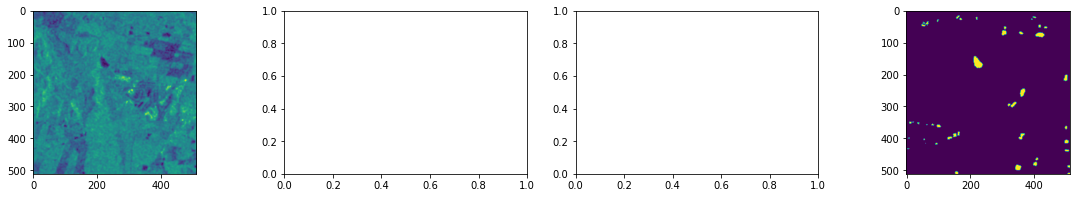

0.25910955905914307
0.9144291806221009


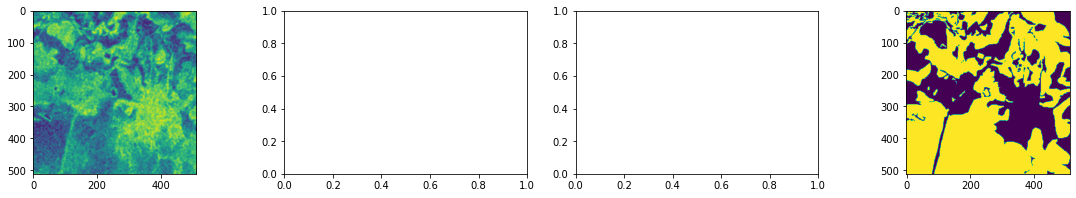

0.01860064785056892
0.9941232633847221


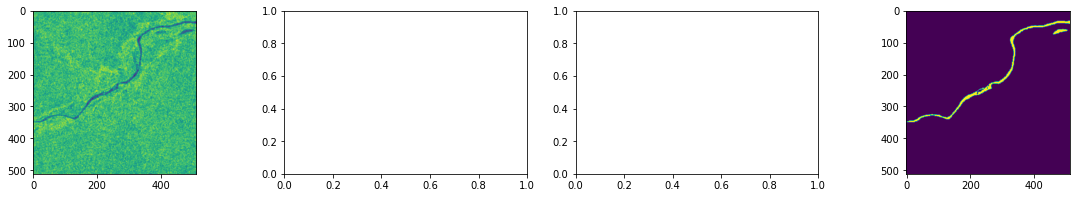

0.0
1.0


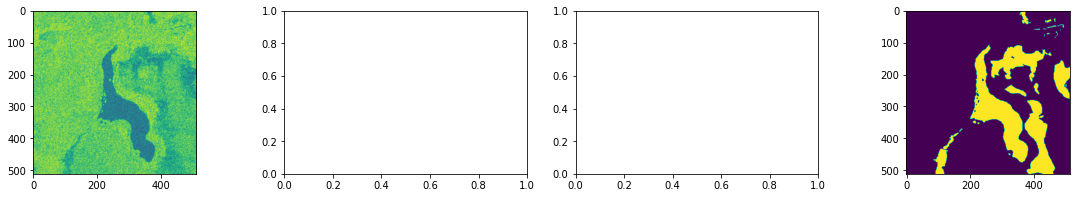

In [38]:
traingen = CustomDataGen(df.chip_id, channels=2, input_shape=512, batch_size=4)

for x, y in traingen:
    break

i = 0
    
for xx, yy in zip(x, y):

    _, ax = plt.subplots(1, 4, figsize=(20, 3))
    for i in range(1):
        ax[i].imshow(xx[:, :, i])
    ax[3].imshow(yy)
    plt.show()


In [42]:
N_CHANNELS = 2
INP_SHAPE = 512
BATCH_SIZE = 8

In [43]:
train_filenames, val_filenames = train_test_split(df.chip_id.values, stratify=df.location, test_size=0.15)

train_datagen = CustomDataGen(train_filenames, channels=N_CHANNELS, 
                              input_shape=INP_SHAPE, batch_size=BATCH_SIZE)

val_datagen = CustomDataGen(val_filenames, channels=N_CHANNELS, input_shape=INP_SHAPE, 
                            batch_size=BATCH_SIZE, augment=False)


In [44]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.applications.efficientnet import *


In [45]:
# plt.imshow(pred[3])
def plot_pred(pred):
    i = 19
    fig, ax = plt.subplots(3, 3, figsize=(15, 15))
    for j in range(3):
        pred_img = np.ma.masked_where((pred[i+j] == 0) | (pred[i+j] == 255), pred[i+j])

        ax[j, 1].imshow(y_test[i+j], cmap='cool')
        ax[j, 2].imshow(pred_img, cmap='cool')
        ax[j, 0].imshow(X_test[i+j])
        ax[j, 0].set_title('original')
        ax[j, 1].set_title('Ground truth')
        ax[j, 2].set_title('prediction')

    return plt.show()

from tensorflow.keras import layers

In [46]:
import segmentation_models as sm
sm.set_framework('tf.keras')
sm.framework()
from tensorflow import keras

Segmentation Models: using `keras` framework.


In [47]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
def iou(y_true, y_pred, smooth = 100):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.square(y_true), axis = -1) + K.sum(K.square(y_pred), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac

def dice_coef(y_true, y_pred, smooth = 100):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def precision(y_true, y_pred):
    '''Calculates the precision, a metric for multi-label classification of
    how many selected items are relevant.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    '''Calculates the recall, a metric for multi-label classification of
    how many relevant items are selected.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def accuracy(y_true, y_pred):
    '''Calculates the mean accuracy rate across all predictions for binary
    classification problems.
    '''
    return K.mean(K.equal(y_true, K.round(y_pred)))

## Tensorflow loading module

In [49]:
from segmentation_models import Unet, FPN, Linknet
from segmentation_models.losses import bce_jaccard_loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input, LeakyReLU, UpSampling2D
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, BatchNormalization, MaxPooling2D, Conv2DTranspose
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D, LeakyReLU
from tensorflow.keras.layers import MaxPooling2D, Dropout, UpSampling2D, concatenate, Reshape
from tensorflow.keras import regularizers
import tensorflow.keras.backend as kb
from tensorflow.keras.applications import ResNet50, MobileNetV2
from tensorflow.keras.optimizers import Adam, SGD
from keras import backend as K
K.clear_session()


## Keras Layers for CNNs
- Previously we built Neural Networks using primarily the Dense, Activation and Dropout Layers.

- Here we will describe how to use some of the CNN-specific layers provided by Keras

### Conv2D

```python
keras.layers.convolutional.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
```

A few parameters explained:
- `filters`: the number of filter used per location.  In other words, the depth of the output.
- `kernel_size`: an (x,y) tuple giving the height and width of the kernel to be used
- `strides`: and (x,y) tuple giving the stride in each dimension.  Default is `(1,1)`
- `input_shape`: required only for the first layer

Note, the size of the output will be determined by the kernel_size, strides

### MaxPooling2D
`keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)`

- `pool_size`: the (x,y) size of the grid to be pooled.
- `strides`: Assumed to be the `pool_size` unless otherwise specified


In [50]:
callbacks = [
    EarlyStopping(patience=2, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=2, min_lr=0.000001, verbose=1),
    # ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_best_only=True, save_weights_only=False),
    # LambdaCallback(on_epoch_end=plot_preds)
]

## U-Net Model

In [51]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model

def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_unet(input_shape):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 16)
    s2, p2 = encoder_block(p1, 32)
    s3, p3 = encoder_block(p2, 64)
    s4, p4 = encoder_block(p3, 64)

    b1 = conv_block(p4, 256)

    d1 = decoder_block(b1, s4, 64)
    d2 = decoder_block(d1, s3, 64)
    d3 = decoder_block(d2, s2, 32)
    d4 = decoder_block(d3, s1, 16)

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    model = Model(inputs, outputs, name="U-Net")
    return model



In [52]:
input_shape = (512, 512, 2)
model_unet2 = build_unet(input_shape)
model_unet2.summary()

Model: "U-Net"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 2) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 16) 304         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 512, 512, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 512, 512, 16) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

2021-12-08 15:26:10.263543: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2021-12-08 15:26:10.263589: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: soet-gpu1
2021-12-08 15:26:10.263597: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: soet-gpu1
2021-12-08 15:26:10.263870: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.86.0
2021-12-08 15:26:10.263899: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.57.2
2021-12-08 15:26:10.263906: E tensorflow/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 470.57.2 does not match DSO version 470.86.0 -- cannot find working devices in this configuration
2021-12-08 15:26:10.264520: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFl

In [53]:
model_unet2.compile(optimizer='adam', 
              # loss=bce_jaccard_loss,
              loss=bce_jaccard_loss,
              metrics=['acc'])

In [54]:
history_unet = model_unet2.fit(train_datagen, epochs=10, validation_data=val_datagen, callbacks=callbacks)


2021-12-08 15:26:10.680863: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
115/115 [==============================] - 396s 3s/step - loss: 1.2709 - acc: 0.8275 - val_loss: 1.3693 - val_acc: 0.8427
Epoch 2/10
115/115 [==============================] - 395s 3s/step - loss: 1.2356 - acc: 0.8380 - val_loss: 1.4111 - val_acc: 0.8453
Epoch 3/10
 41/115 [=========>....................] - ETA: 4:08 - loss: 1.2385 - acc: 0.8333

KeyboardInterrupt: 

In [ ]:
def plot_val(paths, model, plot=True):

    for path in paths:

        with rasterio.open('../core project/flood data/flood-train-images/{}_vv.tif'.format(path)) as fvv:
            vv = fvv.read(1)
        with rasterio.open('../core project/flood data/flood-train-images/{}_vh.tif'.format(path)) as fvh:
            vh = fvh.read(1)

        with rasterio.open('../core project/flood data/flood-train-labels/{}.tif'.format(path)) as fmask:
            mask = process_mask(fmask.read(1))
        
    X = np.zeros((INP_SHAPE, INP_SHAPE, 2))
    X[:, :, 0] = (vh - (vh.min())) / (vh.max() - vh.min())
    X[:, :, 1] = (vv - (vv.min())) / (vv.max() - vv.min())
                        
    
    preds = []
    
    # for model in models:
    eval = model.evaluate(X[np.newaxis, :, :, :])
    print(eval)
    pred = model.predict(X[np.newaxis, :, :, :])[0, :, :, 0]
    preds.append(pred)
        
    pred = np.mean(preds, axis=0)
        
    pred_thresh = pred.copy()
    pred_thresh[pred_thresh > 0.5] = 1
    pred_thresh[pred_thresh <= 0.5] = 0
    pred_thresh = pred_thresh.astype(int)
    
    if plot:
        _, ax = plt.subplots(1, 4, figsize=(16, 4))
    
        ax[0].imshow(X[:, :, 0])
        ax[0].set_title('vh')
        ax[1].imshow(mask)
        ax[1].set_title('gt')
        ax[2].imshow(pred)
        ax[2].set_title('pred')
        ax[3].imshow(pred_thresh)
        ax[3].set_title('thresh_pred')
        if mask.sum() == 0 and pred_thresh.sum() == 0:
            iou = 1
        else:
            intersection = np.logical_and(mask, pred_thresh).sum()
            union = np.logical_or(mask, pred_thresh).sum()
            iou = intersection / union
        plt.suptitle(iou)
        plt.show()
    
    return pred, mask
plot_val(val_filenames, model_unet2)

## Deeplabv3

In [55]:
K.clear_session()

In [56]:
def SqueezeAndExcite(inputs, ratio=8):
    init = inputs
    filters = init.shape[-1]
    se_shape = (1, 1, filters)

    se = GlobalAveragePooling2D()(init)
    se = Reshape(se_shape)(se)
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)
    x = init * se
    return x


In [57]:
def ASPP(inputs):
    """ Image Pooling """
    shape = inputs.shape
    y1 = AveragePooling2D(pool_size=(shape[1], shape[2]))(inputs)
    y1 = Conv2D(128, 1, padding="same", use_bias=False)(y1)
    y1 = BatchNormalization()(y1)
    y1 = Activation("relu")(y1)
    y1 = UpSampling2D((shape[1], shape[2]), interpolation="bilinear")(y1)

    """ 1x1 conv """
    y2 = Conv2D(128, 1, padding="same", use_bias=False)(inputs)
    y2 = BatchNormalization()(y2)
    y2 = Activation("relu")(y2)

    """ 3x3 conv rate=6 """
    y3 = Conv2D(128, 3, padding="same", use_bias=False, dilation_rate=6)(inputs)
    y3 = BatchNormalization()(y3)
    y3 = Activation("relu")(y3)

    """ 3x3 conv rate=12 """
    y4 = Conv2D(128, 3, padding="same", use_bias=False, dilation_rate=12)(inputs)
    y4 = BatchNormalization()(y4)
    y4 = Activation("relu")(y4)

    """ 3x3 conv rate=18 """
    y5 = Conv2D(128, 3, padding="same", use_bias=False, dilation_rate=18)(inputs)
    y5 = BatchNormalization()(y5)
    y5 = Activation("relu")(y5)

    y = Concatenate()([y1, y2, y3, y4, y5])
    y = Conv2D(128, 1, padding="same", use_bias=False)(y)
    y = BatchNormalization()(y)
    y = Activation("relu")(y)

    return y

def deeplabv3_plus(shape):
    """ Input """
    inputs = Input(shape)

    """ Encoder """
    encoder = ResNet50(weights=None, include_top=False, input_tensor=inputs)

    image_features = encoder.get_layer("conv4_block6_out").output
    x_a = ASPP(image_features)
    x_a = UpSampling2D((4, 4), interpolation="bilinear")(x_a)

    x_b = encoder.get_layer("conv2_block2_out").output
    x_b = Conv2D(filters=48, kernel_size=1, padding='same', use_bias=False)(x_b)
    x_b = BatchNormalization()(x_b)
    x_b = Activation('relu')(x_b)

    x = Concatenate()([x_a, x_b])
    x = SqueezeAndExcite(x)

    x = Conv2D(filters=256, kernel_size=3, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=256, kernel_size=3, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SqueezeAndExcite(x)

    x = UpSampling2D((4, 4), interpolation="bilinear")(x)
    x = Conv2D(1, 1)(x)
    x = Activation("sigmoid")(x)

    model = Model(inputs, x)
    return model


In [58]:
model_deeplabv3 = deeplabv3_plus((512, 512, 2))


In [59]:
model_deeplabv3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 2) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 518, 518, 2)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 256, 256, 64) 6336        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 256, 256, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [60]:

model_deeplabv3.compile(optimizer='adam', 
              # loss=bce_jaccard_loss,
              loss=bce_jaccard_loss,
              metrics=['acc'])

In [61]:
history_deep = model_deeplabv3.fit(train_datagen, epochs=10, validation_data=val_datagen, callbacks=callbacks)

Epoch 1/10
115/115 [==============================] - 786s 7s/step - loss: 1.1592 - acc: 0.8445 - val_loss: 1.3773 - val_acc: 0.8505
Epoch 2/10
115/115 [==============================] - 783s 7s/step - loss: 1.1028 - acc: 0.8681 - val_loss: 1.5843 - val_acc: 0.8489
Epoch 3/10
115/115 [==============================] - 783s 7s/step - loss: 1.0571 - acc: 0.8766 - val_loss: 1.3183 - val_acc: 0.8590
Epoch 4/10
115/115 [==============================] - 782s 7s/step - loss: 1.0658 - acc: 0.8817 - val_loss: 1.0418 - val_acc: 0.8875
Epoch 5/10
115/115 [==============================] - 781s 7s/step - loss: 1.0581 - acc: 0.8775 - val_loss: 1.1912 - val_acc: 0.8931
Epoch 6/10
115/115 [==============================] - 781s 7s/step - loss: 1.0308 - acc: 0.8792 - val_loss: 1.6717 - val_acc: 0.6423

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 00006: early stopping


1/1 [==============================] - 0s 389ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
[0.0, 0.0]


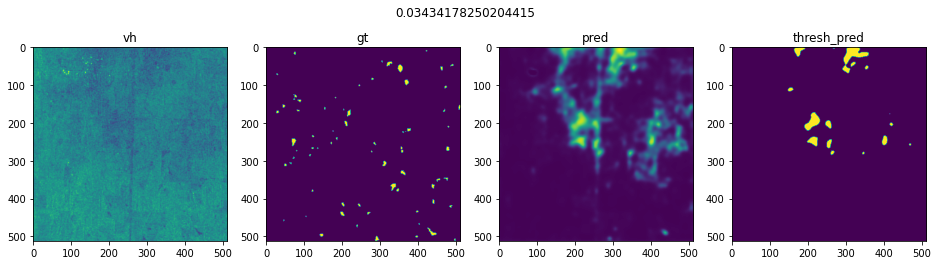

(array([[0.0143007 , 0.0143007 , 0.01374528, ..., 0.03481942, 0.03390706,
         0.03390706],
        [0.0143007 , 0.0143007 , 0.01374528, ..., 0.03481942, 0.03390706,
         0.03390706],
        [0.01349548, 0.01349548, 0.01290712, ..., 0.03375781, 0.0329935 ,
         0.0329935 ],
        ...,
        [0.01648101, 0.01648101, 0.01603287, ..., 0.01901996, 0.01956198,
         0.01956198],
        [0.01722291, 0.01722291, 0.01680866, ..., 0.01969659, 0.0201942 ,
         0.0201942 ],
        [0.01722291, 0.01722291, 0.01680866, ..., 0.01969659, 0.0201942 ,
         0.0201942 ]], dtype=float32),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

In [62]:
def plot_val(paths, model, plot=True):

    for path in paths:

        with rasterio.open('../core project/flood data/flood-train-images/{}_vv.tif'.format(path)) as fvv:
            vv = fvv.read(1)
        with rasterio.open('../core project/flood data/flood-train-images/{}_vh.tif'.format(path)) as fvh:
            vh = fvh.read(1)

        with rasterio.open('../core project/flood data/flood-train-labels/{}.tif'.format(path)) as fmask:
            mask = process_mask(fmask.read(1))
        
    X = np.zeros((INP_SHAPE, INP_SHAPE, 2))
    X[:, :, 0] = (vh - (vh.min())) / (vh.max() - vh.min())
    X[:, :, 1] = (vv - (vv.min())) / (vv.max() - vv.min())
                        
    
    preds = []
    
    # for model in models:
    eval = model.evaluate(X[np.newaxis, :, :, :])
    print(eval)
    pred = model.predict(X[np.newaxis, :, :, :])[0, :, :, 0]
    preds.append(pred)
        
    pred = np.mean(preds, axis=0)
        
    pred_thresh = pred.copy()
    pred_thresh[pred_thresh > 0.5] = 1
    pred_thresh[pred_thresh <= 0.5] = 0
    pred_thresh = pred_thresh.astype(int)
    
    if plot:
        _, ax = plt.subplots(1, 4, figsize=(16, 4))
    
        ax[0].imshow(X[:, :, 0])
        ax[0].set_title('vh')
        ax[1].imshow(mask)
        ax[1].set_title('gt')
        ax[2].imshow(pred)
        ax[2].set_title('pred')
        ax[3].imshow(pred_thresh)
        ax[3].set_title('thresh_pred')
        if mask.sum() == 0 and pred_thresh.sum() == 0:
            iou = 1
        else:
            intersection = np.logical_and(mask, pred_thresh).sum()
            union = np.logical_or(mask, pred_thresh).sum()
            iou = intersection / union
        plt.suptitle(iou)
        plt.show()
    
    return pred, mask
plot_val(val_filenames, model_deeplabv3)

In [63]:
INP_SHAPE = 512
N_CHANNELS = 3
BATCH_SIZE = 4
# K.clear_session()

model = sm.Unet('efficientnetb0', input_shape=(INP_SHAPE, INP_SHAPE, N_CHANNELS), 
                encoder_weights=None, weights=None)

metrics = [
    'mae',
    'accuracy'
]

model.compile(optimizer='rmsprop', 
              # loss=bce_jaccard_loss,
              loss=bce_jaccard_loss,
              
              metrics=metrics)

In [ ]:
results = model.fit(X_train_1d, tf.cast(np.array(y_train_1d).reshape(-1, 512, 512, 1), tf.float32), validation_split=0.2, batch_size=8,
                    epochs=10)


## FCN Model

In [65]:
K.clear_session()


In [66]:
### Multi layer auto encoder with LeakyRelu and Normalization
input_layer = Input(shape=(512,512,2))

# encoder
e = Conv2D(32, (3, 3), padding='same')(input_layer)
e = LeakyReLU(alpha=0.3)(e)
e = BatchNormalization()(e)
e = Conv2D(64, (3, 3), padding='same')(e)
e = LeakyReLU(alpha=0.3)(e)
e = BatchNormalization()(e)
e = Conv2D(64, (3, 3), padding='same')(e)
e = LeakyReLU(alpha=0.3)(e)
e = MaxPooling2D((2, 2), padding='same')(e)

# decoder
d = Conv2D(64, (3, 3), padding='same')(e)
d = LeakyReLU(alpha=0.3)(d)
d = BatchNormalization()(d)

d = Conv2D(64, (3, 3), padding='same')(d)
d = LeakyReLU(alpha=0.3)(d)
# e = BatchNormalization()(e)
d = UpSampling2D((2, 2))(d)
d = Conv2D(32, (3, 3), padding='same')(d)
d = LeakyReLU(alpha=0.2)(d)
# d = Conv2D(128, (3, 3), padding='same')(d)
output_layer = Conv2D(1, (3, 3), padding='same')(d)

In [67]:
# input_img = X_train[0].reshape(512, 512,3
# input_img.shape

In [68]:
optimizer = tf.keras.optimizers.Adam(lr=9e-4, decay=1e-5)
model_fcn = keras.Model(inputs = input_layer,outputs = output_layer)
model_fcn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[iou, dice_coef, precision, recall, accuracy])


In [69]:
model_fcn.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 512, 512, 2)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 512, 512, 32)      608       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 512, 512, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512, 512, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 64)      18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512, 512, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512, 512, 64)      256   

In [70]:
early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=10,
                               verbose=1, 
                               mode='auto')

checkpoint1 = ModelCheckpoint('best_val_loss.h5',
                             monitor='val_loss',
                             save_best_only=True)

checkpoint2 = ModelCheckpoint('best_loss.h5',
                             monitor='loss',
                             save_best_only=True)


In [71]:
history_fcn = model_fcn.fit(train_datagen, epochs=10, validation_data=val_datagen, callbacks=callbacks)

Epoch 1/10
115/115 [==============================] - 595s 5s/step - loss: 2.2558 - iou: 0.0516 - dice_coef: 0.3300 - precision: 0.0198 - recall: 0.0077 - accuracy: 0.0144 - val_loss: 2.3296 - val_iou: 0.2466 - val_dice_coef: 0.3845 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.0024
Epoch 2/10
115/115 [==============================] - 595s 5s/step - loss: 2.1960 - iou: 0.0385 - dice_coef: 0.3389 - precision: 0.0326 - recall: 2.3252e-07 - accuracy: 2.7945e-04 - val_loss: 2.3109 - val_iou: 0.1463 - val_dice_coef: 0.3578 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 6.4709e-04
Epoch 3/10
115/115 [==============================] - 594s 5s/step - loss: 2.2126 - iou: 0.0338 - dice_coef: 0.2977 - precision: 0.2019 - recall: 0.0137 - accuracy: 0.0264 - val_loss: 2.2693 - val_iou: 0.0306 - val_dice_coef: 0.3891 - val_precision: 0.1250 - val_recall: 5.7595e-07 - val_accuracy: 0.0575
Epoch 4/10
115/115 [==============================] - 594s 5s/ste

1/1 [==============================] - 0s 63ms/step - loss: 0.0000e+00 - iou: 0.0000e+00 - dice_coef: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - accuracy: 0.0000e+00
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


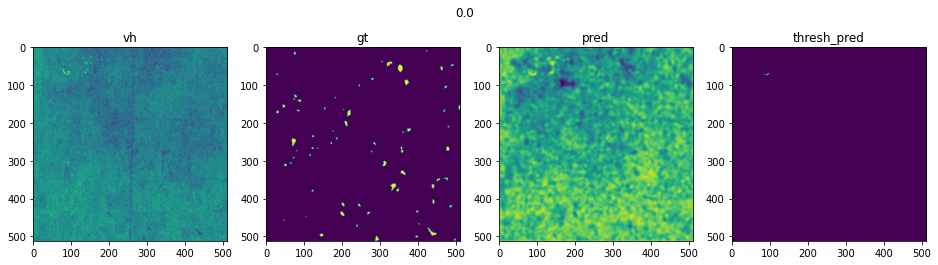

(array([[ 0.13735217, -0.13269183, -0.3730669 , ..., -0.9986831 ,
         -0.7932303 , -0.6607423 ],
        [-0.19282238, -0.7916936 , -1.3218498 , ..., -2.0781798 ,
         -1.4847168 , -1.2577554 ],
        [-0.334341  , -1.2403065 , -1.8889672 , ..., -3.132906  ,
         -2.3012831 , -1.803172  ],
        ...,
        [-0.9037729 , -2.0023382 , -2.665411  , ..., -2.0641208 ,
         -1.6335472 , -1.1757857 ],
        [-0.736494  , -1.6810617 , -2.138302  , ..., -1.5562956 ,
         -1.232043  , -0.9379095 ],
        [-0.9008485 , -1.5680182 , -1.9587125 , ..., -1.4148626 ,
         -1.1404053 , -0.6482832 ]], dtype=float32),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

In [72]:
def plot_val(paths, model, plot=True):

    for path in paths:

        with rasterio.open('../core project/flood data/flood-train-images/{}_vv.tif'.format(path)) as fvv:
            vv = fvv.read(1)
        with rasterio.open('../core project/flood data/flood-train-images/{}_vh.tif'.format(path)) as fvh:
            vh = fvh.read(1)

        with rasterio.open('../core project/flood data/flood-train-labels/{}.tif'.format(path)) as fmask:
            mask = process_mask(fmask.read(1))
        
    X = np.zeros((INP_SHAPE, INP_SHAPE, 2))
    X[:, :, 0] = (vh - (vh.min())) / (vh.max() - vh.min())
    X[:, :, 1] = (vv - (vv.min())) / (vv.max() - vv.min())
                        
    
    preds = []
    
    # for model in models:
    eval = model.evaluate(X[np.newaxis, :, :, :])
    print(eval)
    pred = model.predict(X[np.newaxis, :, :, :])[0, :, :, 0]
    preds.append(pred)
        
    pred = np.mean(preds, axis=0)
        
    pred_thresh = pred.copy()
    pred_thresh[pred_thresh > 0.5] = 1
    pred_thresh[pred_thresh <= 0.5] = 0
    pred_thresh = pred_thresh.astype(int)
    
    if plot:
        _, ax = plt.subplots(1, 4, figsize=(16, 4))
    
        ax[0].imshow(X[:, :, 0])
        ax[0].set_title('vh')
        ax[1].imshow(mask)
        ax[1].set_title('gt')
        ax[2].imshow(pred)
        ax[2].set_title('pred')
        ax[3].imshow(pred_thresh)
        ax[3].set_title('thresh_pred')
        if mask.sum() == 0 and pred_thresh.sum() == 0:
            iou = 1
        else:
            intersection = np.logical_and(mask, pred_thresh).sum()
            union = np.logical_or(mask, pred_thresh).sum()
            iou = intersection / union
        plt.suptitle(iou)
        plt.show()
    
    return pred, mask
plot_val(val_filenames, model_fcn)

In [73]:
import pickle as pk

In [74]:
# filename = "AEmodel_pickled"
# outfile = open(filename, 'wb')

In [75]:
# pickle.dump(,outfile)
# outfile.close()

## U-Net Xception-style model


In [80]:
K.clear_session()


In [81]:

from tensorflow.keras import layers


inputs = keras.Input(shape=(512, 512, 2))

### [First half of the network: downsampling inputs] ###

# Entry block
x = layers.Conv2D(128, 3, strides=2, padding="same")(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

previous_block_activation = x  # Set aside residual

# Blocks 1, 2, 3 are identical apart from the feature depth.
for filters in [ 128, 256]:
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(filters, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)

    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(filters, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)

    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

    # Project residual
    residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
        previous_block_activation
    )
    x = layers.add([x, residual])  # Add back residual
    previous_block_activation = x  # Set aside next residual

### [Second half of the network: upsampling inputs] ###

for filters in [256, 128, 64]:
    x = layers.Activation("relu")(x)
    x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)

    x = layers.Activation("relu")(x)
    x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)

    x = layers.UpSampling2D(2)(x)

    # Project residual
    residual = layers.UpSampling2D(2)(previous_block_activation)
    residual = layers.Conv2D(filters, 1, padding="same")(residual)
    x = layers.add([x, residual])  # Add back residual
    previous_block_activation = x  # Set aside next residual

# Add a per-pixel classification layer
outputs = layers.Conv2D(1, 3, activation="sigmoid", padding="same")(x)

# Define the model
model_unet_x = keras.Model(inputs=inputs, outputs=outputs)


# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()

# Build model
model_unet_x.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 2) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 128 2432        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 128 512         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 128 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [82]:
model_unet_x.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=[iou, dice_coef, precision, recall, accuracy])


In [83]:
history_unet_x = model_unet_x.fit(train_datagen, epochs=10, validation_data=val_datagen, callbacks=callbacks)

Epoch 1/10
115/115 [==============================] - 615s 5s/step - loss: 2.2257 - iou: 0.7688 - dice_coef: 0.0066 - precision: 0.0224 - recall: 0.0067 - accuracy: 0.8503 - val_loss: 2.3158 - val_iou: 0.7711 - val_dice_coef: 4.3748e-04 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.8499
Epoch 2/10
115/115 [==============================] - 612s 5s/step - loss: 1.5515 - iou: 0.7555 - dice_coef: 0.0899 - precision: 0.1334 - recall: 0.0953 - accuracy: 0.8310 - val_loss: 0.5634 - val_iou: 0.7803 - val_dice_coef: 0.0402 - val_precision: 0.2246 - val_recall: 2.7652e-06 - val_accuracy: 0.8556
Epoch 3/10
115/115 [==============================] - 612s 5s/step - loss: 0.4501 - iou: 0.7429 - dice_coef: 0.2026 - precision: 0.4310 - recall: 0.1422 - accuracy: 0.8351 - val_loss: 0.4650 - val_iou: 0.7824 - val_dice_coef: 0.0857 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.8514
Epoch 4/10
115/115 [==============================] - 613s 5s/step - loss

1/1 [==============================] - 0s 153ms/step - loss: 0.0000e+00 - iou: 0.0000e+00 - dice_coef: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - accuracy: 0.0000e+00
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


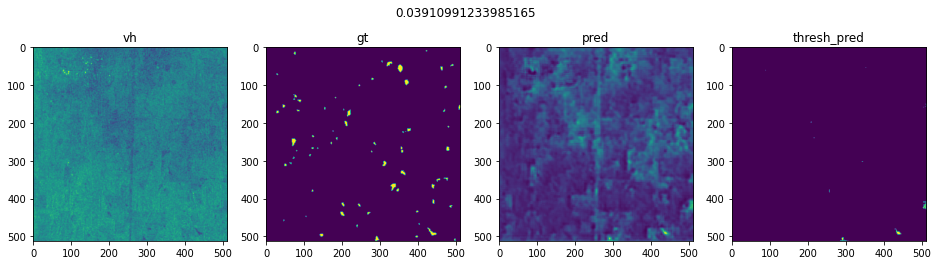

(array([[0.20574474, 0.09821653, 0.10436335, ..., 0.0897294 , 0.08392766,
         0.07881987],
        [0.1104131 , 0.09973639, 0.10745981, ..., 0.1034731 , 0.09260079,
         0.12804681],
        [0.11598203, 0.11404964, 0.12518871, ..., 0.11141747, 0.09702808,
         0.13134772],
        ...,
        [0.12338662, 0.13764417, 0.15005755, ..., 0.14536417, 0.12569597,
         0.20658252],
        [0.12198481, 0.11943555, 0.12729746, ..., 0.12837893, 0.1149168 ,
         0.20186135],
        [0.14239722, 0.19189727, 0.1970903 , ..., 0.20304942, 0.18931678,
         0.4495179 ]], dtype=float32),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

In [84]:
def plot_val(paths, model, plot=True):

    for path in paths:

        with rasterio.open('../core project/flood data/flood-train-images/{}_vv.tif'.format(path)) as fvv:
            vv = fvv.read(1)
        with rasterio.open('../core project/flood data/flood-train-images/{}_vh.tif'.format(path)) as fvh:
            vh = fvh.read(1)

        with rasterio.open('../core project/flood data/flood-train-labels/{}.tif'.format(path)) as fmask:
            mask = process_mask(fmask.read(1))
        
    X = np.zeros((INP_SHAPE, INP_SHAPE, 2))
    X[:, :, 0] = (vh - (vh.min())) / (vh.max() - vh.min())
    X[:, :, 1] = (vv - (vv.min())) / (vv.max() - vv.min())
                        
    
    preds = []
    
    # for model in models:
    eval = model.evaluate(X[np.newaxis, :, :, :])
    print(eval)
    pred = model.predict(X[np.newaxis, :, :, :])[0, :, :, 0]
    preds.append(pred)
        
    pred = np.mean(preds, axis=0)
        
    pred_thresh = pred.copy()
    pred_thresh[pred_thresh > 0.5] = 1
    pred_thresh[pred_thresh <= 0.5] = 0
    pred_thresh = pred_thresh.astype(int)
    
    if plot:
        _, ax = plt.subplots(1, 4, figsize=(16, 4))
    
        ax[0].imshow(X[:, :, 0])
        ax[0].set_title('vh')
        ax[1].imshow(mask)
        ax[1].set_title('gt')
        ax[2].imshow(pred)
        ax[2].set_title('pred')
        ax[3].imshow(pred_thresh)
        ax[3].set_title('thresh_pred')
        if mask.sum() == 0 and pred_thresh.sum() == 0:
            iou = 1
        else:
            intersection = np.logical_and(mask, pred_thresh).sum()
            union = np.logical_or(mask, pred_thresh).sum()
            iou = intersection / union
        plt.suptitle(iou)
        plt.show()
    
    return pred, mask
plot_val(val_filenames, model_unet_x)

## SEGNET

In [85]:
K.clear_session()


In [86]:
# Encoding layer
img_input = Input(shape= (512, 512, 2))

x = Conv2D(32, (3, 3), padding='same', name='conv1',strides= (1,1))(img_input)
x = BatchNormalization(name='bn1')(x)
x = Activation('relu')(x)
x = Conv2D(32, (3, 3), padding='same', name='conv2')(x)
x = BatchNormalization(name='bn2')(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(64, (3, 3), padding='same', name='conv3')(x)
x = BatchNormalization(name='bn3')(x)
x = Activation('relu')(x)
x = Conv2D(64, (3, 3), padding='same', name='conv4')(x)
x = BatchNormalization(name='bn4')(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

# x = Conv2D(128, (3, 3), padding='same', name='conv5')(x)
# x = BatchNormalization(name='bn5')(x)
x = Activation('relu')(x)
x = Conv2D(128, (3, 3), padding='same', name='conv6')(x)
x = BatchNormalization(name='bn6')(x)
x = Activation('relu')(x)
x = Conv2D(128, (3, 3), padding='same', name='conv7')(x)
x = BatchNormalization(name='bn7')(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

# x = Conv2D(256, (3, 3), padding='same', name='conv8')(x)
# x = BatchNormalization(name='bn8')(x)
# x = Activation('relu')(x)
x = Conv2D(256, (3, 3), padding='same', name='conv9')(x)
x = BatchNormalization(name='bn9')(x)
x = Activation('relu')(x)
x = Conv2D(256, (3, 3), padding='same', name='conv10')(x)
x = BatchNormalization(name='bn10')(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

# x = Dense(512, activation = 'relu', name='fc1')(x)
# x = Dense(512, activation = 'relu', name='fc2')(x)
# Decoding Layer 

x = UpSampling2D()(x)
# x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv4')(x)
# x = BatchNormalization(name='bn17')(x)
# x = Activation('relu')(x)
# x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv5')(x)
# x = BatchNormalization(name='bn18')(x)
# x = Activation('relu')(x)
# x = Conv2DTranspose(256, (3, 3), padding='same', name='deconv6')(x)
# x = BatchNormalization(name='bn19')(x)
# x = Activation('relu')(x)

x = UpSampling2D()(x)
x = Conv2DTranspose(256, (3, 3), padding='same', name='deconv7')(x)
x = BatchNormalization(name='bn20')(x)
x = Activation('relu')(x)
x = Conv2DTranspose(128, (3, 3), padding='same', name='deconv8')(x)
x = BatchNormalization(name='bn21')(x)
x = Activation('relu')(x)
# x = Conv2DTranspose(64, (3, 3), padding='same', name='deconv9')(x)
# x = BatchNormalization(name='bn22')(x)
# x = Activation('relu')(x)

x = UpSampling2D()(x)
x = Conv2DTranspose(64, (3, 3), padding='same', name='deconv10')(x)
x = BatchNormalization(name='bn23')(x)
x = Activation('relu')(x)
x = Conv2DTranspose(32, (3, 3), padding='same', name='deconv11')(x)
x = BatchNormalization(name='bn24')(x)
x = Activation('relu')(x)

x = UpSampling2D()(x)
x = Conv2DTranspose(32, (3, 3), padding='same', name='deconv12')(x)
x = BatchNormalization(name='bn25')(x)
x = Activation('relu')(x)
x = Conv2DTranspose(1, (3, 3), padding='same', name='deconv13')(x)
x = BatchNormalization(name='bn26')(x)
x = Activation('sigmoid')(x)
pred = Reshape((512,512, 1))(x)

model_seg = Model(inputs=img_input, outputs=pred)

model_seg.compile(optimizer= optimizer, loss= tf.keras.losses.BinaryCrossentropy()
              , metrics=[iou, dice_coef, precision, recall, accuracy])
model_seg.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 512, 512, 2)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 512, 512, 32)      608       
_________________________________________________________________
bn1 (BatchNormalization)     (None, 512, 512, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 512, 512, 32)      0         
_________________________________________________________________
conv2 (Conv2D)               (None, 512, 512, 32)      9248      
_________________________________________________________________
bn2 (BatchNormalization)     (None, 512, 512, 32)      128       
_________________________________________________________________
activation_1 (Activation)    (None, 512, 512, 32)      0     

In [87]:
history_seg = model_seg.fit(train_datagen, epochs=10, validation_data=val_datagen, callbacks=callbacks)

Epoch 1/10
115/115 [==============================] - 585s 5s/step - loss: 0.6916 - iou: 0.5277 - dice_coef: 0.2365 - precision: 0.2332 - recall: 0.5175 - accuracy: 0.6943 - val_loss: 0.7052 - val_iou: 0.4906 - val_dice_coef: 0.2163 - val_precision: 0.1596 - val_recall: 0.8961 - val_accuracy: 0.2858
Epoch 2/10
115/115 [==============================] - 583s 5s/step - loss: 0.6625 - iou: 0.5363 - dice_coef: 0.2412 - precision: 0.2658 - recall: 0.5766 - accuracy: 0.7084 - val_loss: 0.5724 - val_iou: 0.5647 - val_dice_coef: 0.1991 - val_precision: 0.1461 - val_recall: 6.9251e-06 - val_accuracy: 0.8504
Epoch 3/10
115/115 [==============================] - 584s 5s/step - loss: 0.6495 - iou: 0.5397 - dice_coef: 0.2396 - precision: 0.2805 - recall: 0.6016 - accuracy: 0.7336 - val_loss: 0.5646 - val_iou: 0.5706 - val_dice_coef: 0.2121 - val_precision: 0.5061 - val_recall: 0.0199 - val_accuracy: 0.8514
Epoch 4/10
115/115 [==============================] - 583s 5s/step - loss: 0.6353 - iou: 0.54

1/1 [==============================] - 0s 145ms/step - loss: 0.0000e+00 - iou: 0.0000e+00 - dice_coef: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - accuracy: 0.0000e+00
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


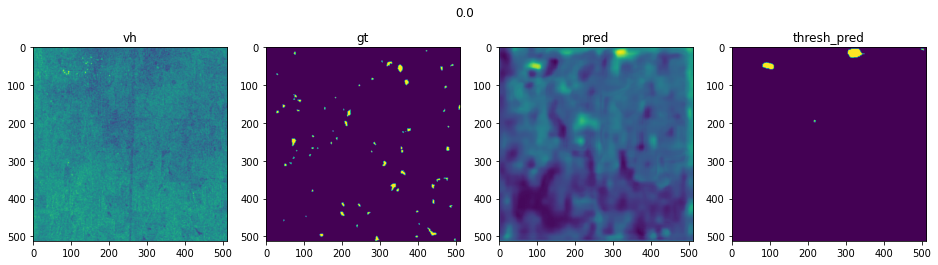

(array([[0.4381984 , 0.44260246, 0.43063855, ..., 0.4788587 , 0.4797862 ,
         0.48563528],
        [0.41654426, 0.40442485, 0.38862225, ..., 0.44363424, 0.44160613,
         0.45246765],
        [0.4210009 , 0.41622806, 0.38553315, ..., 0.45457774, 0.44023734,
         0.45026916],
        ...,
        [0.42779472, 0.42963263, 0.40446162, ..., 0.40730888, 0.41038296,
         0.42842647],
        [0.42355514, 0.42504126, 0.40662044, ..., 0.41111174, 0.4131605 ,
         0.4271035 ],
        [0.45966023, 0.47185865, 0.4591651 , ..., 0.45874327, 0.461923  ,
         0.4578265 ]], dtype=float32),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

In [88]:
def plot_val(paths, model, plot=True):

    for path in paths:

        with rasterio.open('../core project/flood data/flood-train-images/{}_vv.tif'.format(path)) as fvv:
            vv = fvv.read(1)
        with rasterio.open('../core project/flood data/flood-train-images/{}_vh.tif'.format(path)) as fvh:
            vh = fvh.read(1)

        with rasterio.open('../core project/flood data/flood-train-labels/{}.tif'.format(path)) as fmask:
            mask = process_mask(fmask.read(1))
        
    X = np.zeros((INP_SHAPE, INP_SHAPE, 2))
    X[:, :, 0] = (vh - (vh.min())) / (vh.max() - vh.min())
    X[:, :, 1] = (vv - (vv.min())) / (vv.max() - vv.min())
                        
    
    preds = []
    
    # for model in models:
    eval = model.evaluate(X[np.newaxis, :, :, :])
    print(eval)
    pred = model.predict(X[np.newaxis, :, :, :])[0, :, :, 0]
    preds.append(pred)
        
    pred = np.mean(preds, axis=0)
        
    pred_thresh = pred.copy()
    pred_thresh[pred_thresh > 0.5] = 1
    pred_thresh[pred_thresh <= 0.5] = 0
    pred_thresh = pred_thresh.astype(int)
    
    if plot:
        _, ax = plt.subplots(1, 4, figsize=(16, 4))
    
        ax[0].imshow(X[:, :, 0])
        ax[0].set_title('vh')
        ax[1].imshow(mask)
        ax[1].set_title('gt')
        ax[2].imshow(pred)
        ax[2].set_title('pred')
        ax[3].imshow(pred_thresh)
        ax[3].set_title('thresh_pred')
        if mask.sum() == 0 and pred_thresh.sum() == 0:
            iou = 1
        else:
            intersection = np.logical_and(mask, pred_thresh).sum()
            union = np.logical_or(mask, pred_thresh).sum()
            iou = intersection / union
        plt.suptitle(iou)
        plt.show()
    
    return pred, mask
plot_val(val_filenames, model_seg)

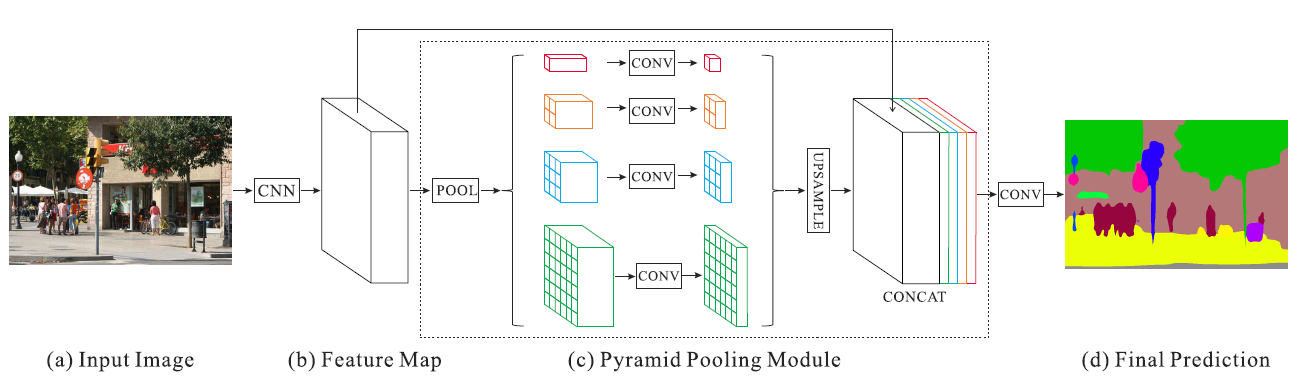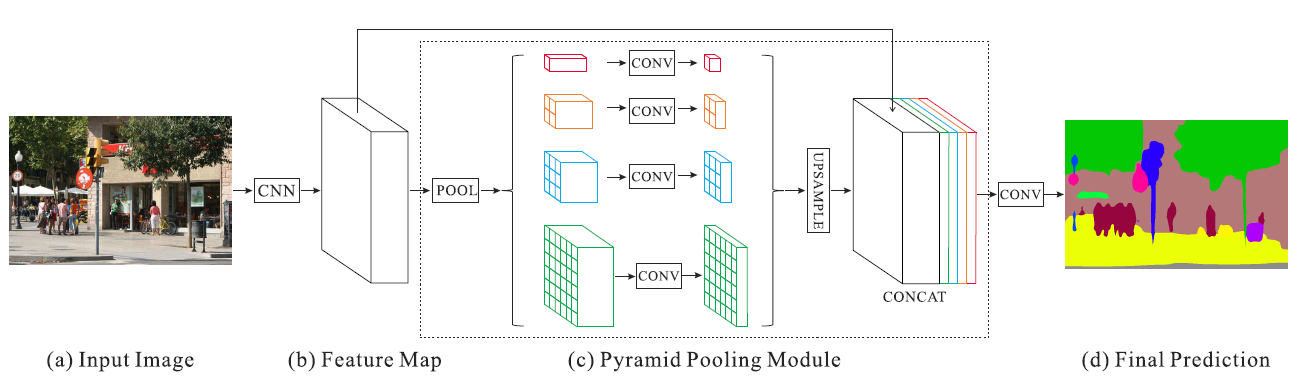

## U-Net with backbone as moblienetv2

In [56]:

def build_mobilenetv2_unet(input_shape):    ## (512, 512, 3)
    """ Input """
    inputs = Input(shape=input_shape, name='input_1')
    

    """ Pre-trained MobileNetV2 """
    encoder = MobileNetV2(include_top=False, weights=None,
        input_tensor=inputs, alpha=1.4)

    """ Encoder """
    s1 = encoder.get_layer('input_1').output                ## (512 x 512)
    s2 = encoder.get_layer("block_1_expand_relu").output    ## (256 x 256)
    s3 = encoder.get_layer("block_3_expand_relu").output    ## (128 x 128)
    s4 = encoder.get_layer("block_6_expand_relu").output    ## (64 x 64)

    """ Bridge """
    b1 = encoder.get_layer("block_13_expand_relu").output   ## (32 x 32)

    """ Decoder """
    d1 = decoder_block(b1, s4, 128)                         ## (64 x 64)
    d2 = decoder_block(d1, s3, 64)                         ## (128 x 128)
    d3 = decoder_block(d2, s2, 32)                         ## (256 x 256)
    d4 = decoder_block(d3, s1, 16)                          ## (512 x 512)

    """ Output """
    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    model = Model(inputs, outputs, name="MobileNetV2_U-Net")
    return model



In [57]:
model_mobilenet = build_mobilenetv2_unet((512, 512, 2))

In [58]:
model_mobilenet.summary()

Model: "MobileNetV2_U-Net"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 2) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 256, 256, 48) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 256, 256, 48) 192         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 256, 256, 48) 0           bn_Conv1[0][0]                   
__________________________________________________________________________________

In [59]:
model_mobilenet.compile(optimizer='adam', 
              # loss=bce_jaccard_loss,
              loss=bce_jaccard_loss,
              metrics=['acc'])


In [60]:
history_mobilenet = model_mobilenet.fit(train_datagen, epochs=10, validation_data=val_datagen, callbacks=callbacks)

2021-12-07 17:09:46.113852: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
115/115 [==============================] - 471s 4s/step - loss: 1.3700 - acc: 0.7765 - val_loss: 1.3013 - val_acc: 0.8713
Epoch 2/10
115/115 [==============================] - 464s 4s/step - loss: 1.2532 - acc: 0.8073 - val_loss: 1.3211 - val_acc: 0.8702
Epoch 3/10
115/115 [==============================] - 463s 4s/step - loss: 1.2181 - acc: 0.8358 - val_loss: 1.3958 - val_acc: 0.8695

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 00003: early stopping


1/1 [==============================] - 0s 309ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
[0.0, 0.0]


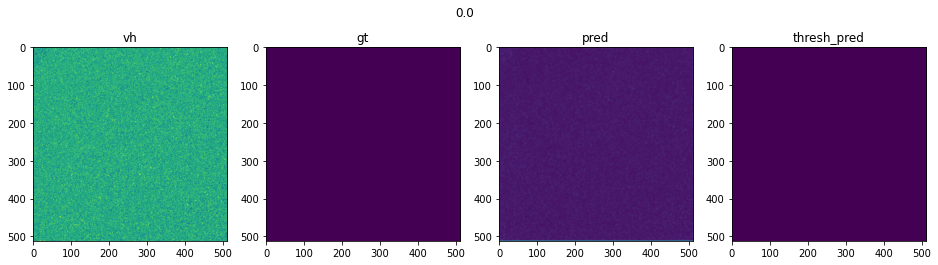

(array([[0.23888281, 0.20150399, 0.09051222, ..., 0.13902491, 0.095954  ,
         0.29564434],
        [0.14831811, 0.08978054, 0.06415811, ..., 0.06138492, 0.07004228,
         0.2135387 ],
        [0.13761741, 0.05903679, 0.04072854, ..., 0.04144707, 0.04158065,
         0.20669702],
        ...,
        [0.10688743, 0.06812814, 0.04356384, ..., 0.05673024, 0.05523002,
         0.20980704],
        [0.18088812, 0.07573137, 0.07507637, ..., 0.07168201, 0.07747883,
         0.23876357],
        [0.29748917, 0.16833937, 0.20334348, ..., 0.15211004, 0.2237865 ,
         0.29809117]], dtype=float32),
 array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]], dtype=uint8))

In [61]:
def plot_val(paths, model, plot=True):

    for path in paths:

        with rasterio.open('../core project/flood data/flood-train-images/{}_vv.tif'.format(path)) as fvv:
            vv = fvv.read(1)
        with rasterio.open('../core project/flood data/flood-train-images/{}_vh.tif'.format(path)) as fvh:
            vh = fvh.read(1)

        with rasterio.open('../core project/flood data/flood-train-labels/{}.tif'.format(path)) as fmask:
            mask = process_mask(fmask.read(1))
        
    X = np.zeros((INP_SHAPE, INP_SHAPE, 2))
    X[:, :, 0] = (vh - (vh.min())) / (vh.max() - vh.min())
    X[:, :, 1] = (vv - (vv.min())) / (vv.max() - vv.min())
                        
    
    preds = []
    
    # for model in models:
    eval = model.evaluate(X[np.newaxis, :, :, :])
    print(eval)
    pred = model.predict(X[np.newaxis, :, :, :])[0, :, :, 0]
    preds.append(pred)
        
    pred = np.mean(preds, axis=0)
        
    pred_thresh = pred.copy()
    pred_thresh[pred_thresh > 0.5] = 1
    pred_thresh[pred_thresh <= 0.5] = 0
    pred_thresh = pred_thresh.astype(int)
    
    if plot:
        _, ax = plt.subplots(1, 4, figsize=(16, 4))
    
        ax[0].imshow(X[:, :, 0])
        ax[0].set_title('vh')
        ax[1].imshow(mask)
        ax[1].set_title('gt')
        ax[2].imshow(pred)
        ax[2].set_title('pred')
        ax[3].imshow(pred_thresh)
        ax[3].set_title('thresh_pred')
        if mask.sum() == 0 and pred_thresh.sum() == 0:
            iou = 1
        else:
            intersection = np.logical_and(mask, pred_thresh).sum()
            union = np.logical_or(mask, pred_thresh).sum()
            iou = intersection / union
        plt.suptitle(iou)
        plt.show()
    
    return pred, mask
plot_val(val_filenames, model_mobilenet)

## Unet with backbone as resnet-50

In [64]:
def build_resnet50_unet(input_shape):
    """ Input """
    inputs = Input(input_shape, name='inputs_1')

    """ Pre-trained ResNet50 Model """
    resnet50 = ResNet50(include_top=False, weights=None,
        input_tensor=inputs)

    """ Encoder """
    s1 = resnet50.get_layer('inputs_1').output           ## (512 x 512)
    s2 = resnet50.get_layer("conv1_relu").output        ## (256 x 256)
    s3 = resnet50.get_layer("conv2_block3_out").output  ## (128 x 128)
    s4 = resnet50.get_layer("conv3_block4_out").output  ## (64 x 64)

    """ Bridge """
    b1 = resnet50.get_layer("conv4_block6_out").output  ## (32 x 32)

    """ Decoder """
    d1 = decoder_block(b1, s4, 128)                     ## (64 x 64)
    d2 = decoder_block(d1, s3, 64)                     ## (128 x 128)
    d3 = decoder_block(d2, s2, 32)                     ## (256 x 256)
    d4 = decoder_block(d3, s1, 16)                      ## (512 x 512)

    """ Output """
    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    model = Model(inputs, outputs, name="ResNet50_U-Net")
    return model



In [65]:
model_resnet50_unet = build_resnet50_unet((512, 512, 2))
model_resnet50_unet.summary()


Model: "ResNet50_U-Net"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs_1 (InputLayer)           [(None, 512, 512, 2) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 518, 518, 2)  0           inputs_1[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 256, 256, 64) 6336        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 256, 256, 64) 256         conv1_conv[0][0]                 
_____________________________________________________________________________________

In [66]:
model_resnet50_unet.compile(optimizer='adam', 
              # loss=bce_jaccard_loss,
              loss=bce_jaccard_loss,
              metrics=['acc'])


In [67]:
history_resnet50_unet = model_resnet50_unet.fit(train_datagen, epochs=10, validation_data=val_datagen, callbacks=callbacks)

2021-12-07 18:26:33.040324: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
115/115 [==============================] - 608s 5s/step - loss: 1.3849 - acc: 0.7630 - val_loss: 1.3630 - val_acc: 0.8457
Epoch 2/10
115/115 [==============================] - 602s 5s/step - loss: 1.2670 - acc: 0.8266 - val_loss: 1.3067 - val_acc: 0.8772
Epoch 3/10
115/115 [==============================] - 596s 5s/step - loss: 1.2344 - acc: 0.8289 - val_loss: 2.8799 - val_acc: 0.8664
Epoch 4/10
115/115 [==============================] - 595s 5s/step - loss: 1.2224 - acc: 0.8387 - val_loss: 1.5319 - val_acc: 0.5220

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 00004: early stopping


1/1 [==============================] - 0s 367ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
[0.0, 0.0]


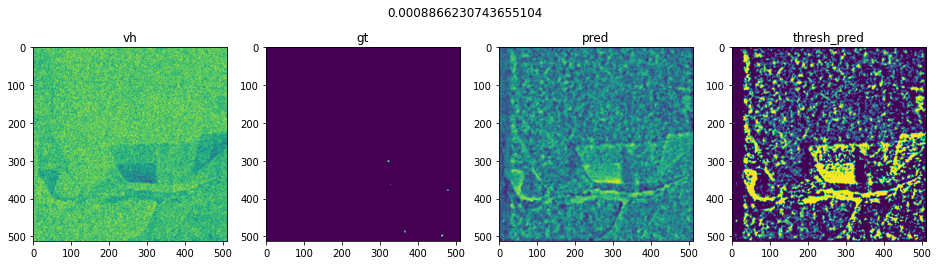

(array([[0.39462608, 0.40012974, 0.34316155, ..., 0.37615615, 0.30764508,
         0.39969045],
        [0.38444054, 0.4110195 , 0.3194685 , ..., 0.27719712, 0.3496142 ,
         0.3296528 ],
        [0.35830766, 0.3304178 , 0.2142396 , ..., 0.23846942, 0.23742306,
         0.2413584 ],
        ...,
        [0.32435995, 0.35198885, 0.09389499, ..., 0.10242787, 0.17397028,
         0.23365313],
        [0.31674471, 0.2136397 , 0.13410416, ..., 0.1141817 , 0.18819577,
         0.20494923],
        [0.33812678, 0.2944445 , 0.15821129, ..., 0.16938537, 0.16953912,
         0.27988517]], dtype=float32),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

In [68]:
def plot_val(paths, model, plot=True):

    for path in paths:

        with rasterio.open('../core project/flood data/flood-train-images/{}_vv.tif'.format(path)) as fvv:
            vv = fvv.read(1)
        with rasterio.open('../core project/flood data/flood-train-images/{}_vh.tif'.format(path)) as fvh:
            vh = fvh.read(1)

        with rasterio.open('../core project/flood data/flood-train-labels/{}.tif'.format(path)) as fmask:
            mask = process_mask(fmask.read(1))
        
    X = np.zeros((INP_SHAPE, INP_SHAPE, 2))
    X[:, :, 0] = (vh - (vh.min())) / (vh.max() - vh.min())
    X[:, :, 1] = (vv - (vv.min())) / (vv.max() - vv.min())
                        
    
    preds = []
    
    # for model in models:
    eval = model.evaluate(X[np.newaxis, :, :, :])
    print(eval)
    pred = model.predict(X[np.newaxis, :, :, :])[0, :, :, 0]
    preds.append(pred)
        
    pred = np.mean(preds, axis=0)
        
    pred_thresh = pred.copy()
    pred_thresh[pred_thresh > 0.5] = 1
    pred_thresh[pred_thresh <= 0.5] = 0
    pred_thresh = pred_thresh.astype(int)
    
    if plot:
        _, ax = plt.subplots(1, 4, figsize=(16, 4))
    
        ax[0].imshow(X[:, :, 0])
        ax[0].set_title('vh')
        ax[1].imshow(mask)
        ax[1].set_title('gt')
        ax[2].imshow(pred)
        ax[2].set_title('pred')
        ax[3].imshow(pred_thresh)
        ax[3].set_title('thresh_pred')
        if mask.sum() == 0 and pred_thresh.sum() == 0:
            iou = 1
        else:
            intersection = np.logical_and(mask, pred_thresh).sum()
            union = np.logical_or(mask, pred_thresh).sum()
            iou = intersection / union
        plt.suptitle(iou)
        plt.show()
    
    return pred, mask
plot_val(val_filenames, model_resnet50_unet)